In [2]:
#  LLSE(X,Y) produces the LLSE estimate Xhat of X from Y as well as the mean-squared error MSE
#  and the coefficient of determination R2.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
concrete_data = pd.read_csv("concretedata(1).csv")
concreteX = concrete_data.loc[:,'csMPa']
concreteX = concreteX.to_numpy()
concrete_mat = concrete_data.drop(columns = 'csMPa',inplace=False)
concreteY = concrete_mat.to_numpy()
print(concreteX)
print(concreteY)

[79.99 61.89 40.27 ... 23.7  32.77 32.4 ]
[[ 540.     0.     0.  ... 1040.   676.    28. ]
 [ 540.     0.     0.  ... 1055.   676.    28. ]
 [ 332.5  142.5    0.  ...  932.   594.   270. ]
 ...
 [ 148.5  139.4  108.6 ...  892.4  780.    28. ]
 [ 159.1  186.7    0.  ...  989.6  788.9   28. ]
 [ 260.9  100.5   78.3 ...  864.5  761.5   28. ]]


In [4]:
def LLSE(X,Y):
    XYstack = np.column_stack((X, Y)) #concatenate X and Y
    meanstack = np.mean(XYstack, axis=0) #mean of X and Y
    covstack = np.cov(XYstack, rowvar=False) #covariance of X and Y
    muX = meanstack[0] #extract mean of X
    muY = meanstack[1:] #extract mean of Y
    sigmaXY = covstack[0,1:] #extract cross-covariance matrix of X and Y
    sigmaY = covstack[1:,1:] #extract covariance matrix of Y

    Xhat = muX + (Y - muY) @ np.linalg.inv(sigmaY).T @ sigmaXY.T

    
    #Your code for predicting X from Y via LLSE vector estimation. 
    #Keep in mind that the notes and videos represent random vectors as 
    #column vectors, where as here they are the rows of a data matrix. You will
    #need to take appropriate transposes to implement the LLSE formula.

    MSE = np.mean((X - Xhat) ** 2)
    #Your code for calculating the mean-squared error between X and Xhat.

    R2 = 1 - MSE / np.var(X)
    #Your code for calculating the coefficient of determination between X and Xhat.

    return Xhat, MSE, R2

MSE: 107.19723607486017
R2: 0.6155198704142721


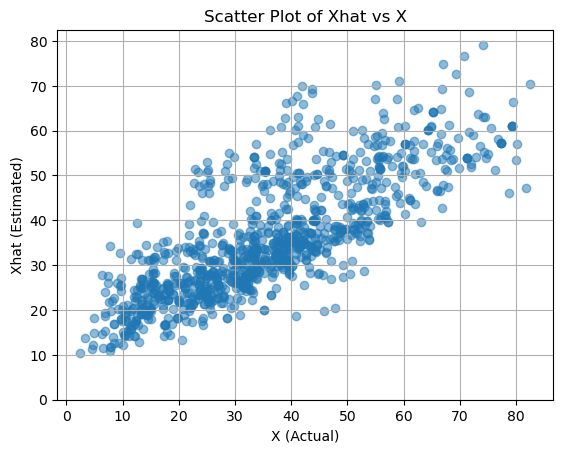

In [5]:
#d)
Xhat, MSE, R2 = LLSE(concreteX, concreteY)
print("MSE:", MSE)
print("R2:", R2)

plt.scatter(concreteX, Xhat, alpha=0.5)
plt.title('Scatter Plot of Xhat vs X')
plt.xlabel('X (Actual)')
plt.ylabel('Xhat (Estimated)')
plt.grid(True)
plt.ylim(bottom = 0)
plt.show()

Best Feature Index: 0
Best MSE: 209.7113198295558
Best R2: 0.24783661989797434


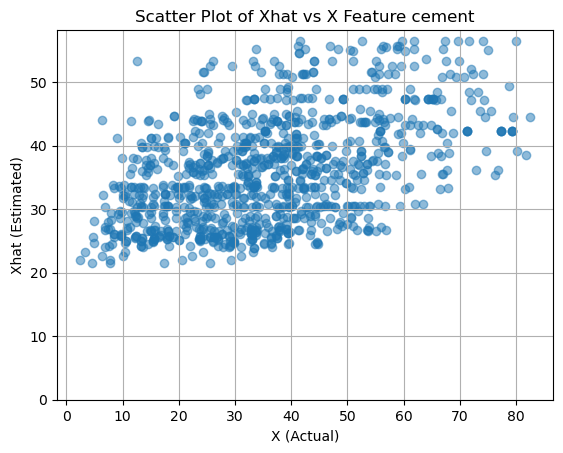

In [6]:
#e)
best_R2 = -np.inf
best_MSE = np.inf
best_feature_index = -1
best_Xhat = None


for i in range(concreteY.shape[1]):
    Xhat, MSE, R2 = LLSE(concreteX, concreteY[:, i:i+1]) 

    if R2 > best_R2:
        best_R2 = R2
        best_MSE = MSE
        best_feature_index = i
        best_Xhat = Xhat

# Print the results
print("Best Feature Index:", best_feature_index)
print("Best MSE:", best_MSE)
print("Best R2:", best_R2)

plt.scatter(concreteX, best_Xhat, alpha=0.5)
plt.title(f'Scatter Plot of Xhat vs X Feature {concrete_data.columns[best_feature_index]}')
plt.xlabel('X (Actual)')
plt.ylabel('Xhat (Estimated)')
plt.grid(True)
plt.ylim(bottom=0)
plt.show()

MSE (Quadratic Fit): 62.94749983094016
R2 (Quadratic Fit): 0.7742286669108132


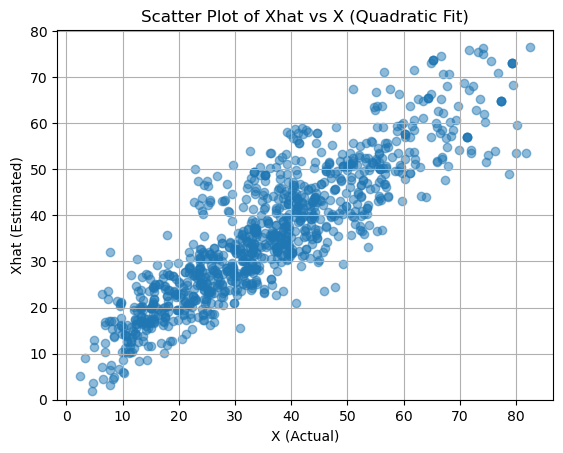

In [7]:
#f)
Y_augmented = np.column_stack((concreteY, np.square(concreteY)))

# Apply LLSE to the augmented data
Xhat, MSE, R2 = LLSE(concreteX, Y_augmented)

# Print the results
print("MSE (Quadratic Fit):", MSE)
print("R2 (Quadratic Fit):", R2)

# Scatter plot of Xhat (Quadratic Fit) vs X
plt.scatter(concreteX, Xhat, alpha=0.5)
plt.title('Scatter Plot of Xhat vs X (Quadratic Fit)')
plt.xlabel('X (Actual)')
plt.ylabel('Xhat (Estimated)')
plt.grid(True)
plt.ylim(bottom=0)
plt.show()